<a href="https://colab.research.google.com/github/Kr1stik/Forecasting/blob/main/Copy_of_ForecastingSept252025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Regression and Time Series Forecasting**

Sept 25 , 2025 @ STIWNU

**Scikit-learn** is an open-source Python library for machine learning, providing tools for tasks like regression, classification, clustering, and more.
It’s built on NumPy, SciPy, and integrates well with Pandas for data preprocessing and modeling.

Key Features:

**Algorithms:** Supports linear regression, decision trees, random forests, SVMs, and more for regression and other tasks.

**Preprocessing:** Tools for scaling, encoding, and splitting data into training/test sets.

**Evaluation:** Metrics like MSE, RMSE, R² for regression, or accuracy for classification.

**Pipeline:** Streamline workflows by combining preprocessing and modeling steps.

In [ ]:
# Test
print("HEllo World")

***GPU Check***

**Pandas** is an open-source Python library for data manipulation and analysis. It provides data structures like DataFrames (tabular data) and Series (single-column data) to handle structured data efficiently.

Think of it as a powerful tool for loading, cleaning, transforming, and exploring data, much like a spreadsheet in Python.

**Key Features:**

**DataFrame:** A 2D table (rows and columns) for storing data.

**Data Operations:** Filter, group, merge, reshape, and handle missing values.

**Input/Output:** Read/write data from CSV, Excel, JSON, SQL, etc.

**Time Series Support:** Built-in tools for handling dates and time-based data (e.g., parsing Date in the retail sales dataset).


**Install/Update Outdated Libs**

In [26]:
!pip install pmdarima
!pip install numpy==1.26.4
!pip install --upgrade  pandas scikit-learn statsmodels pmdarima matplotlib

In [25]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**Import Libraries**

Enable CUDA support (FOR GPU) enabled (optional)

In [33]:
%load_ext cudf.pandas
%load_ext cuml.accel

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


RuntimeError: Function "cuInit" not found

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
# for Time Series Later
from statsmodels.tsa.arima.model import ARIMA

## **Regression (Basic Prediction)**

**Definition:** A supervised learning technique to predict a continuous output variable (dependent variable) based on one or more input variables (features/independent variables).

**Purpose:** Model the relationship between features and a target variable to make predictions for new, unseen data points.

**Dataset:** Predict house prices from size & bedrooms

**Load Dataset**

In [4]:
url = "https://raw.githubusercontent.com/saging123/pandasbasic/refs/heads/main/house_prices.csv"
data = pd.read_csv(url)

**Read the Sample Rows**

In [5]:
print("Sample data:\n", data.head(2))

Sample data:
    size  bedrooms   price
0   850         2  150000
1   900         3  170000


**Visualize raw Dataset**

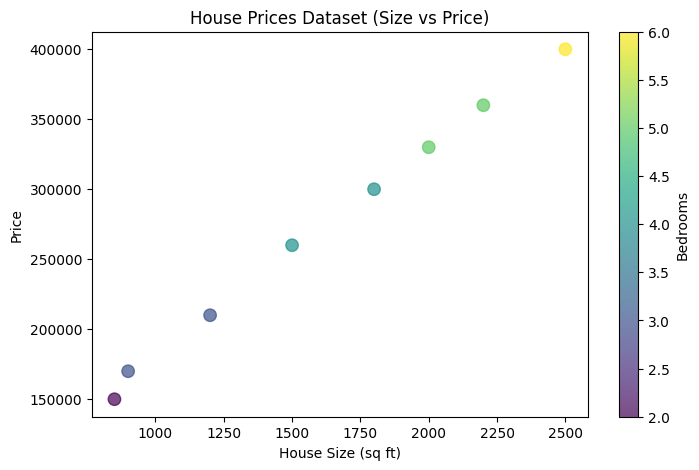

In [6]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(
    data["size"], data["price"],
    c=data["bedrooms"], cmap="viridis", s=80, alpha=0.7
)
plt.colorbar(scatter, label="Bedrooms")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.title("House Prices Dataset (Size vs Price)")
plt.show()



---



**Indicate Data**

*Independent Variables* (features , X-Axis)
`size and bedrooms`

*Dependent Variables* (target, Y-Axis) `price`

In [7]:
X = data[["size", "bedrooms"]]
y = data["price"]



---



**Train Two Models**

**Linear Regression:**

A statistical method that models the relationship between input features ( Size, Bedrooms) and a continuous target variable (Price) as a linear equation: **`y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ`**.
Assumes a linear relationship between features and target.
Example: Predicting house prices based on size, bedrooms.

In [8]:
lin_model = LinearRegression()
lin_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Decision Tree Regression**

A machine learning method that predicts a continuous target by recursively splitting the feature space into regions based on feature values, then assigning a value ( **`average target`**) to each region.
Non-linear model that captures complex patterns through a tree-like structure.
Example: Predicting house prices by splitting data based on thresholds (**`Size > 1500 sq ft`**).

In [9]:
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


**Predictions**

`Price for 1700 sq ft, 3 bedrooms`

In [10]:
X_test = pd.DataFrame([[1700, 3]],columns=["size", "bedrooms"])
lin_pred = lin_model.predict(X_test)
tree_pred = tree_model.predict(X_test)

print(f"Linear Regression prediction: {lin_pred[0]:.2f}")
print(f"Decision Tree prediction: {tree_pred[0]:.2f}")

Linear Regression prediction: 275278.86
Decision Tree prediction: 300000.00


**Model Evaluation**

**MSE stands for Mean Squared Error**. It’s a common metric used to measure the average squared difference between predicted and actual values in regression tasks. Mathematically, it’s defined as:
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
where:

$n$ is the number of observations,
$y_i$ is the actual value,
$\hat{y}_i$ is the predicted value.

*`A lower MSE indicates better model performance`*, as it means predictions are closer to actual values. It’s widely used in machine learning, statistics, and data science to evaluate regression models.


In [11]:
lin_mse = mean_squared_error(y, lin_model.predict(X))
tree_mse = mean_squared_error(y, tree_model.predict(X))

print(f"Linear Regression MSE: {lin_mse:.2f}")
print(f"Decision Tree MSE: {tree_mse:.2f}")

Linear Regression MSE: 10047700.59
Decision Tree MSE: 0.00


**Visualize Output**

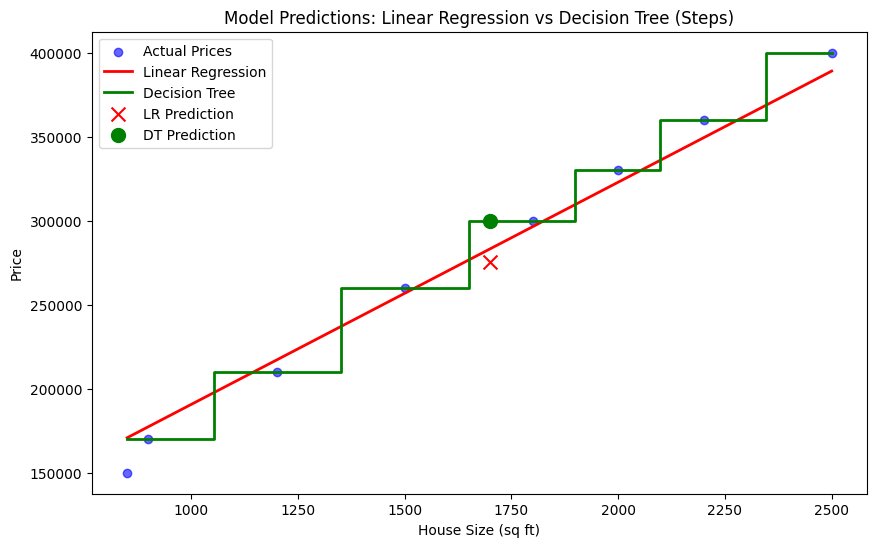

In [12]:
plt.figure(figsize=(10,6))

# Actual data
plt.scatter(data["size"], data["price"], color="blue", label="Actual Prices", alpha=0.6)

# Range of house sizes (holding bedrooms fixed at mean)
size_range = np.linspace(data["size"].min(), data["size"].max(), 200).reshape(-1, 1)
bedrooms_mean = np.full_like(size_range, data["bedrooms"].mean())

X_range = pd.DataFrame(
    np.hstack([size_range, bedrooms_mean]),
    columns=["size", "bedrooms"]
)

# Predictions for the size range
lin_preds = lin_model.predict(X_range)
tree_preds = tree_model.predict(X_range)

# Plot linear regression line
plt.plot(size_range, lin_preds, color="red", linewidth=2, label="Linear Regression")

# Plot decision tree (step-like) predictions
plt.step(size_range.flatten(), tree_preds, where="mid",
         color="green", linewidth=2, label="Decision Tree")

# Single test example
X_test = pd.DataFrame([[1700, 3]], columns=["size", "bedrooms"])
lin_pred = lin_model.predict(X_test)
tree_pred = tree_model.predict(X_test)

# Plot predictions for the test point
plt.scatter(X_test["size"], lin_pred, color="red", s=100, marker="x", label="LR Prediction")
plt.scatter(X_test["size"], tree_pred, color="green", s=100, marker="o", label="DT Prediction")

# Labels and legend
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.title("Model Predictions: Linear Regression vs Decision Tree (Steps)")
plt.legend()
plt.show()


## **Time Series**


**Definition:** A technique to predict future values of a variable based on its historical values, often considering temporal patterns like trends and seasonality.

**Purpose:** Forecast future values in a sequence of data points indexed by time, leveraging temporal dependencies.

**Example from Dataset:** Forecasting next month's retail sales (e.g., for June 2025) based on historical monthly sales (e.g., PHP 50,000 in January 2025, PHP 52,000 in February 2025).

**Load Data**

In [43]:
url = "https://raw.githubusercontent.com/saging123/pandasbasic/refs/heads/main/daily_sales.csv"
data = pd.read_csv(url, parse_dates=["date"])
data.set_index("date", inplace=True)

Set As Daily Frequency

In [44]:
data = data.asfreq("D")

**Read Sample**

In [45]:
print("Sample data:\n", data.head(2))

Sample data:
              sales
date              
2024-01-01  204.97
2024-01-02  216.27


**Visualize**

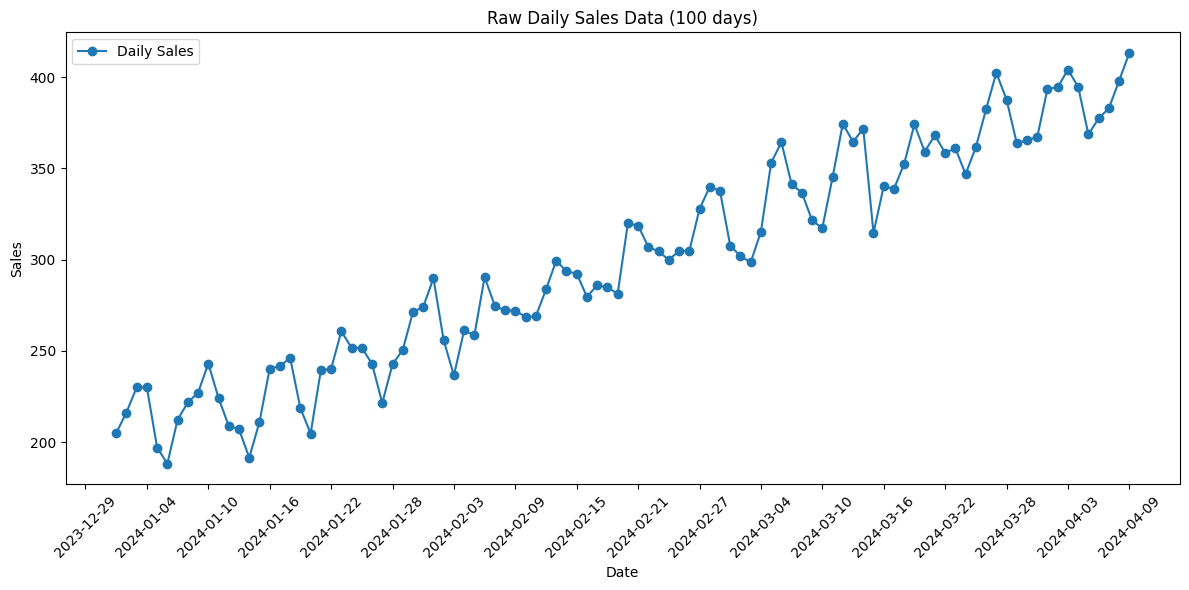

In [46]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data["sales"], marker="o", linestyle="-", label="Daily Sales")
plt.title("Raw Daily Sales Data (" + str(len(data))+" days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # rotate x-axis labels for readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend()
plt.tight_layout()
plt.show()

**Create A Lag**

**Definition:** Lag features are previous values of a time series used as input features to predict future values. For example, using yesterday’s sales (`lag1`) to predict today’s sales.

**Purpose:** Time series data often has temporal dependencies (e.g., today’s sales may depend on yesterday’s). Lag features capture these dependencies, allowing standard machine learning models (e.g., Linear Regression, Decision Tree Regression) to be applied to time series forecasting.

**Example:**
If today is 2025-01-03 with sales of 48000, the lag1 feature is the sales from 2025-01-02 (52000).
The model learns to predict 48000 (today’s sales) using 52000 (yesterday’s sales).

The `Pandas shift(1)` method moves all values in the `sales` column down by `one row`, so the sales from day `t-1 a`ppear in the `lag1 column `for day t. The first row gets NaN because there’s no prior day.

In [47]:
data["lag1"] = data["sales"].shift(1) # create new column lag1 where all values in sales column move down by 1
data = data.dropna()  # remove first row (because lag1 is NaN)

X = data[["lag1"]]   # yesterday's sales
y = data["sales"]    # today's sales

**Train Linear Regression**

In [48]:
lin_model = LinearRegression()
lin_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Let's create some dummy data to demonstrate the Linear Regression model for time series.

In [49]:
# Create dummy data
dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
dummy_sales_data = {
    'sales': [100, 110, 105, 120, 115, 125, 130, 122, 135, 140]
}
data = pd.DataFrame(dummy_sales_data, index=dates)
data.index.name = "date"

print("Dummy data:\n", data)

Dummy data:
             sales
date             
2024-01-01    100
2024-01-02    110
2024-01-03    105
2024-01-04    120
2024-01-05    115
2024-01-06    125
2024-01-07    130
2024-01-08    122
2024-01-09    135
2024-01-10    140


Now, we can create the 'lag1' feature and drop the rows with NaN values.

In [50]:
data["lag1"] = data["sales"].shift(1)
data = data.dropna()

X = data[["lag1"]]
y = data["sales"]

print("\nData with lag1 feature:\n", data)
print("\nX:\n", X)
print("\ny:\n", y)


Data with lag1 feature:
             sales   lag1
date                    
2024-01-02    110  100.0
2024-01-03    105  110.0
2024-01-04    120  105.0
2024-01-05    115  120.0
2024-01-06    125  115.0
2024-01-07    130  125.0
2024-01-08    122  130.0
2024-01-09    135  122.0
2024-01-10    140  135.0

X:
              lag1
date             
2024-01-02  100.0
2024-01-03  110.0
2024-01-04  105.0
2024-01-05  120.0
2024-01-06  115.0
2024-01-07  125.0
2024-01-08  130.0
2024-01-09  122.0
2024-01-10  135.0

y:
 date
2024-01-02    110
2024-01-03    105
2024-01-04    120
2024-01-05    115
2024-01-06    125
2024-01-07    130
2024-01-08    122
2024-01-09    135
2024-01-10    140
Freq: D, Name: sales, dtype: int64


Finally, we can train the Linear Regression model using this dummy data.

In [51]:
lin_model = LinearRegression()
lin_model.fit(X, y)

print("\nLinear Regression model trained successfully!")


Linear Regression model trained successfully!


**Linear Regression next day**

In [52]:
last_sales = data["sales"].iloc[-1]
next_pred_lin = lin_model.predict([[last_sales]])
print(f"Linear Regression Forecast (next day): {next_pred_lin[0]:.2f}")

Linear Regression Forecast (next day): 138.29


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(




---


**Train ARIMA**

ARIMA stands for `AutoRegressive Integrated Moving Average.`
It’s a statistical model used for time series forecasting, designed to predict future values based on historical data by capturing patterns like trends and temporal dependencies.
Unlike regression models (e.g., Linear Regression),

ARIMA is specifically built for time series data and doesn’t require manual feature engineering like lag features, as it inherently models temporal relationships.

**d** handles trend (start with 1 if data is trending).

**p** handles autocorrelation (look at PACF).

**q** handles noise/shocks (look at ACF).









Automatically find best (p,d,q)

`test='adf'`

Uses the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary (constant mean & variance over time).
ARIMA models require stationary data.

If data has a trend, it’s not stationary → we “difference” it (d > 0).

`auto_arima` runs the ADF test and decides the right d (how many times to difference the data).
Example: d=1 → subtract each value from the previous one.


Augmented Dickey-Fuller (ADF)

In [53]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] <= 0.05:
    print("Data is stationary (reject null hypothesis of unit root)")
else:
    print("Data is NOT stationary (fail to reject null hypothesis)")


ADF Statistic: -0.3380643169252474
p-value: 0.9199375981127912
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
Data is NOT stationary (fail to reject null hypothesis)


Visualize our dataset

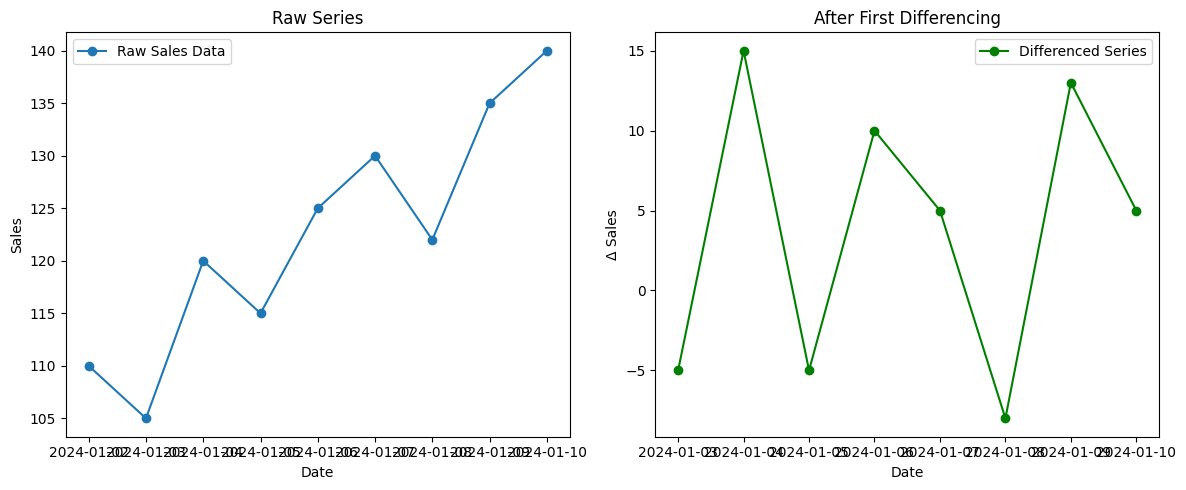

In [54]:
plt.figure(figsize=(12,5))

# Raw series
plt.subplot(1,2,1)
plt.plot(data.index, data["sales"], marker="o", label="Raw Sales Data")
plt.title("Raw Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

# Differenced series (first difference)
plt.subplot(1,2,2)
plt.plot(data.index[1:], data["sales"].diff().dropna(), marker="o", color="green", label="Differenced Series")
plt.title("After First Differencing")
plt.xlabel("Date")
plt.ylabel("Δ Sales")
plt.legend()

plt.tight_layout()
plt.show()

`seasonal=False`
Tells auto_arima to use non-seasonal ARIMA instead of seasonal SARIMA.

Some data has repeating cycles (weekly sales, monthly weather patterns).

If no such cycles exist, adding seasonality just overcomplicates things.

The model will only search for (p, d, q) (simple ARIMA).
If you had weekly seasonality, you’d set seasonal=True, m=7.


`stepwise=True`

 Uses a smart search algorithm (stepwise selection) instead of brute-forcing all (p, d, q) combinations.

Brute force is very slow (especially for big max_p & max_q).

Stepwise tries models in a logical order and prunes bad ones early.

Faster fitting while still finding a near-optimal model.

In [55]:
from pmdarima import auto_arima
best_arima_model = auto_arima(
    data['sales'],
    start_p=1, start_q=1,
    test='adf',        # ADF test to find optimal d (stationarity)
    max_p=3, max_q=3,  # search up to AR=3, MA=3
    m=12,               # frequency (1 = no seasonal cycle here)
    d=None,            # let auto_arima decide differencing
    seasonal=True,    # non-seasonal ARIMA
    start_P=0, D=0,    # seasonal params (ignored since seasonal=False)
    trace=True,        # print progress
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True      # stepwise search for efficiency
)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,0)[12]             : AIC=60.411, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,0)[12]             : AIC=62.411, Time=0.03 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=62.411, Time=0.02 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=64.411, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=56.981, Time=0.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,1)[12]             : AIC=inf, Time=0.19 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,1)[12]             : AIC=60.545, Time=0.37 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=53.292, Time=0.04 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,0,0)[12]             : AIC=inf, Time=0.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,1)[12]             : AIC=inf, Time=0.32 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,0,1)[12]             : AIC=56.321, Time=0.43 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=55.174, Time=0.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[12]             : AIC=inf, Time=0.19 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(2,2,0)(0,0,0)[12] intercept   : AIC=55.144, Time=0.12 sec

Best model:  ARIMA(2,2,0)(0,0,0)[12]          
Total fit time: 3.432 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Apply The Obtained Model**

In [56]:

print("Best Seasonal Order: ",  best_arima_model.seasonal_order)
print("Best Non Seasonal Order: ", best_arima_model.order)
arima_model = ARIMA(data["sales"], order=best_arima_model.order, seasonal_order=best_arima_model.seasonal_order)
arima_result = arima_model.fit()

Best Seasonal Order:  (0, 0, 0, 12)
Best Non Seasonal Order:  (2, 2, 0)




---





---



**Forecasting**



---


**ARIMA Overlap 10 days**

In [57]:
n_overlap = 10
start = len(data["sales"]) - n_overlap
end = len(data["sales"]) - 1
pred_overlap = arima_result.predict(start=start, end=end)
print(pred_overlap)

date
2024-01-10    132.014686
Freq: D, dtype: float64


**ARIMA  Predict Future 10 Days**

In [58]:
forecast_arima = arima_result.forecast(steps=10)
print("ARIMA Forecast (next 10 days):")
print(forecast_arima)

ARIMA Forecast (next 10 days):
2024-01-11    137.294021
2024-01-12    151.432150
2024-01-13    150.409016
2024-01-14    154.514829
2024-01-15    165.020612
2024-01-16    162.839606
2024-01-17    171.565600
2024-01-18    177.091115
2024-01-19    177.379670
2024-01-20    187.192957
Freq: D, Name: predicted_mean, dtype: float64


**Visualize**

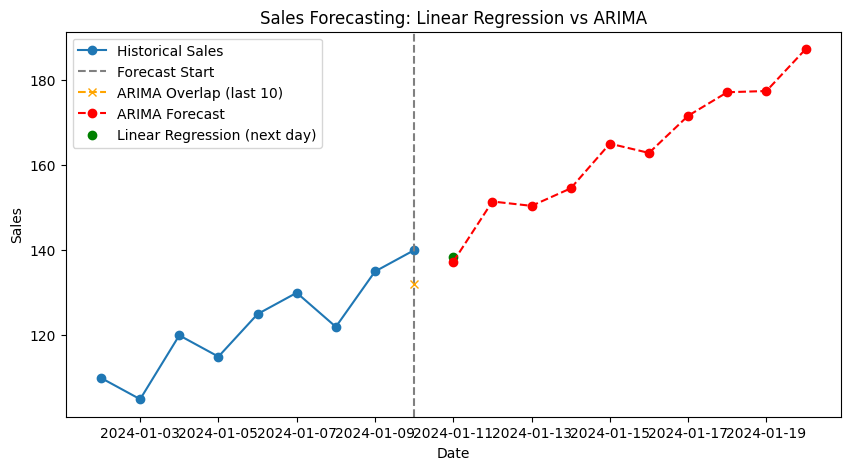

In [59]:
plt.figure(figsize=(10,5))

last_30 = data.tail(30); # plot last 30 rows

# Historical data
plt.plot(last_30.index, last_30["sales"], marker="o", label="Historical Sales")

# Forecast start marker
plt.axvline(last_30.index[-1], color="gray", linestyle="--", label="Forecast Start")

# Overlap ARIMA (last 10 points)
plt.plot(pred_overlap.index, pred_overlap, marker="x", linestyle="--", color="orange", label=f"ARIMA Overlap (last {n_overlap})")

# Future ARIMA forecast (10 days ahead)
future_dates = pd.date_range(start=last_30.index[-1]+pd.Timedelta(days=1), periods=10)
plt.plot(future_dates, forecast_arima, marker="o", linestyle="--", color="red", label="ARIMA Forecast")

# Linear Regression (next day only)
plt.scatter(last_30.index[-1] + pd.Timedelta(days=1), next_pred_lin, color="green", label="Linear Regression (next day)")

# Labels and legend
plt.title("Sales Forecasting: Linear Regression vs ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()